# REQUIRED LIBRARIES


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import nltk

# DATA EXPLORATION

In [2]:
train_data_path=r"/content/train_data.txt"
train_data=pd.read_csv(train_data_path,sep=":::",names=["Movie_name","Genre","Description"],engine="python")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 1 to 1603
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   1603 non-null   object
 1   Genre        1603 non-null   object
 2   Description  1603 non-null   object
dtypes: object(3)
memory usage: 50.1+ KB


In [4]:
train_data.describe()

,Movie_name,Genre,Description
count,1603,1603,1603
unique,1603,27,1603
top,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
freq,1,399,1


In [5]:
train_data.isnull().sum()

,0
Movie_name,0
Genre,0
Description,0


In [29]:
test_data_path=r"/content/test_data.txt"
test_data=pd.read_csv(test_data_path,sep=":::",names=["Movie_name","Genre","Description"],engine="python")

In [30]:
test_data.isnull().sum()

,0
Movie_name,0
Genre,0
Description,0


In [31]:
test_data.describe()

,Movie_name
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54200 non-null  int64 
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [33]:
train_data.head()

,Movie_name,Genre,Description,genre_label
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,0
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,2
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,0
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,0


In [34]:
test_data.head()

,Movie_name,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


Text(0.5, 1.0, 'Gener distripution')

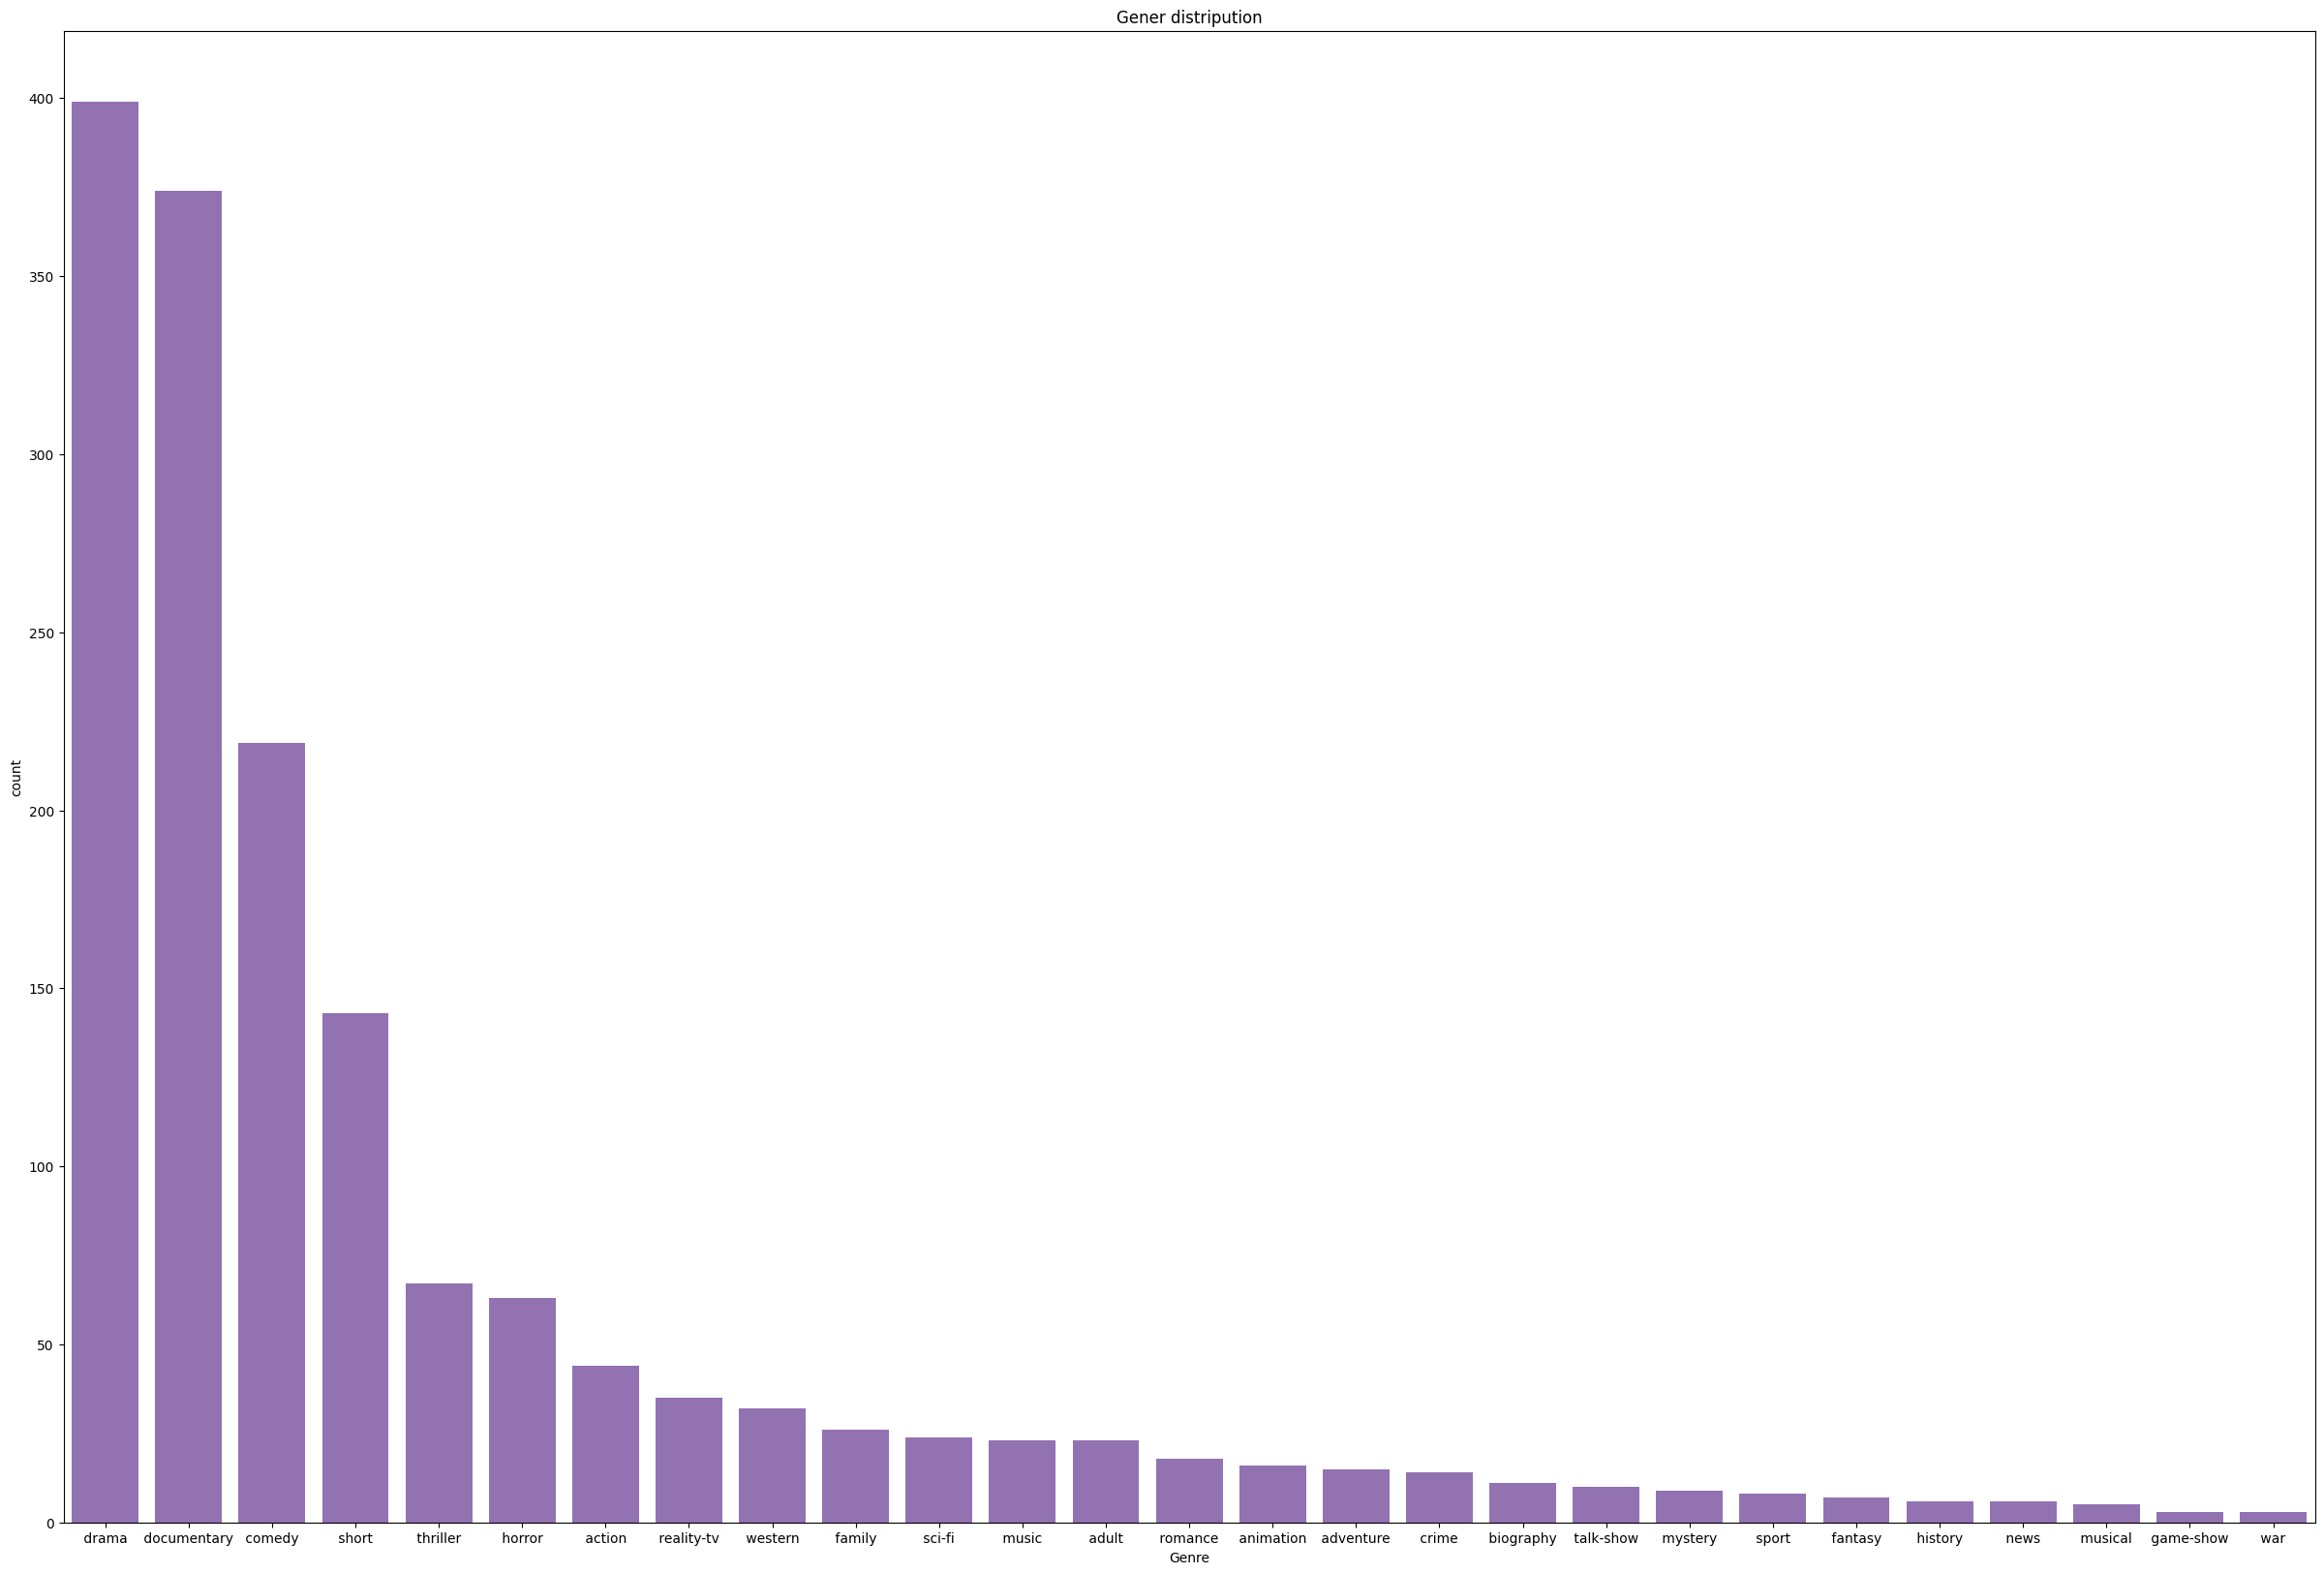

In [36]:
plt.figure(figsize=(30,20))
sns.countplot(data=train_data,order= train_data["Genre"].value_counts().index,x="Genre",color="#9467bd")
plt.title("Gener distripution")

# DATA MANIPULATION

In [13]:
genre_labels = train_data['Genre'].unique()
genre_to_label = {genre: i for i, genre in enumerate(genre_labels)}
train_data['genre_label'] = train_data['Genre'].map(genre_to_label)

In [14]:
X = train_data['Description']
y = train_data['Genre']

In [17]:
X_test = test_data['Description']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

# TF-IDF vectorizer

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes

In [43]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

Validation accuracy: 0.38006230529595014


# Evaluation

In [44]:
y_pred = clf.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, y_pred)
print('Validation accuracy:', accuracy)

Validation accuracy: 0.38006230529595014


In [47]:
y_test_pred = clf.predict(X_test_tfidf)
print(y_test_pred)

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' documentary '
 ' drama ']
